<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

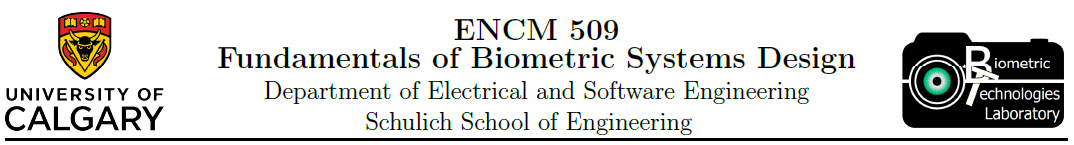

# Lab 2 report

| Student name | UCID |
| -------------|----:|
| Rian Opperman | 30118288 |
|Mohammed Alshoura | 30126200|

In [56]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm, Normal

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Exercise 1

In [2]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 80

pop_norm_1 = norm.rvs(mu, std, size=qtt_samples)
pop_norm_2 = norm.rvs(mu, std, 1000)

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.title("Synthetic population 1")

plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.title("Synthetic population 2")

Text(0.5, 1.0, 'Synthetic population 2')

In [3]:
x = np.arange(40, 60, 0.01)
yticks = np.arange(np.min(pop_norm_1), np.max(pop_norm_1), 0.01)

mu_pop_1 = np.mean(pop_norm_1)
mu_pop_2 = np.mean(pop_norm_2)
std_pop_1 = np.std(pop_norm_1)
std_pop_2 = np.std(pop_norm_2)

pop_pdf_1 = norm.pdf(x, mu_pop_1, std_pop_1)
pop_pdf_2 = norm.pdf(x, mu_pop_2, std_pop_2)

plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.plot(x, pop_pdf_1)
plt.legend([f"mean = {mu_pop_1:.2f}, std = {std_pop_1:.2f}"])
plt.title("Synthetic population 1")

plt.subplot(1,2,2, sharex=ax2, sharey=ax2)
plt.plot(x, pop_pdf_2, 'orange')
plt.legend([f"mean = {mu_pop_2:.2f}, std = {std_pop_2:.2f}"])
plt.title("Synthetic population 2")

Text(0.5, 1.0, 'Synthetic population 2')

In [4]:
plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.legend([f"mean = {mu_pop_1:.2f}\nstd = {std_pop_1:.2f}", f"mean = {mu_pop_2:.2f}\nstd = {std_pop_2:.2f}"])
plt.title("Histograms")

plt.subplot(1,2,2)
plt.plot(x, pop_pdf_2, color='orange')
plt.plot(x, pop_pdf_1)
plt.legend([f"mean = {mu_pop_1:.2f}, std = {std_pop_1:.2f}", f"mean = {mu_pop_2:.2f}, std = {std_pop_2:.2f}"])
plt.title("Normal distribution")

Text(0.5, 1.0, 'Normal distribution')

### Is this needed?

In [5]:
# Needed?
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

### Analysis

Comparing the calculations and graphs produced above, we can see that with more samples we arrive closer to the 'true' mean and standard deviation. For example, the 80 sample data set's standard deviation is farther from the true value of `5` than the 1000 sample data set, and the 1000 sample data set generally is closer to the true mean of `50` than the 80 sample data set, however variability in generating the data set does sometimes lead to the 80 sample data set being closer to the 'true' mean.

As well, when considering the histograms produced and the differing amount of 'bins' used, we can see that generally with more bins we achieve greater fidelity in our data and with more bins we arrive at an almost Normal distribution like shape. This also helps further strengthen the inherent connection between the Probability Density function and the frequency of values in the dataset.

> Add more here

## Exercise 2

In [47]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'C:/Users/abual/Documents/Repos/ENCM509/lab2/signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '21.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,86.103801,68.845620,0.013672,0
1,86.103801,67.830876,0.113498,2
2,86.103801,68.845620,0.046937,2
3,86.103801,67.830876,0.148717,15
4,86.103801,67.830876,0.148717,15


In [48]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = plt.get_cmap('jet', np.max(prs1)+1)

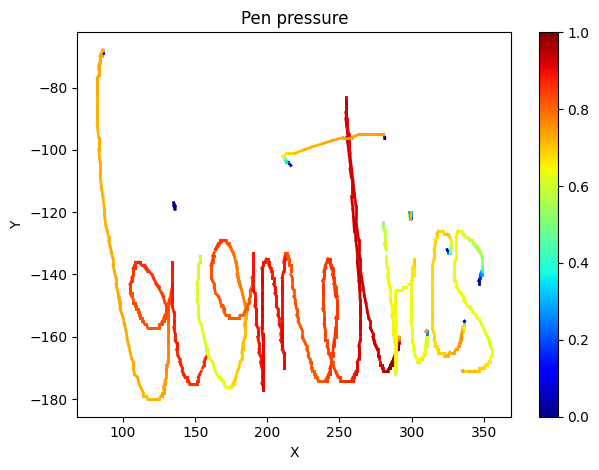

In [49]:
fig, ax = plt.subplots()

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], linewidth=2, color=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax)

plt.show()

C:\Users\abual\AppData\Local\Temp\ipykernel_31756\1618719281.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prs1_arranged = np.arange(min(prs1), max(prs1), 0.01)


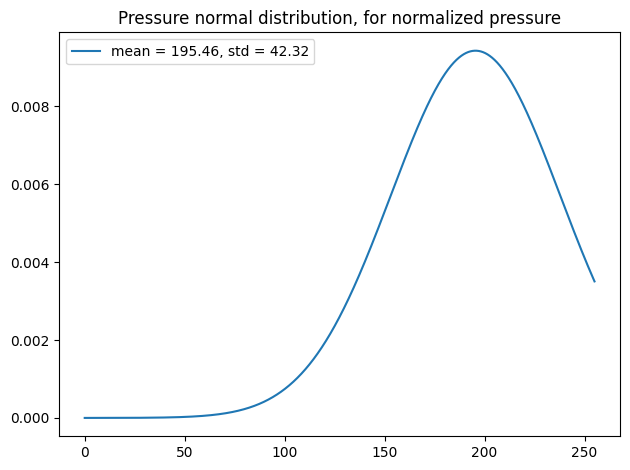

In [70]:
prs1_arranged = np.arange(min(prs1), max(prs1), 0.01)

mu_prs1 = np.mean(prs1)
std_prs1 = np.std(prs1)

prs1_pdf = norm.pdf(prs1_arranged, mu_prs1, std_prs1)


plt.plot(prs1_arranged, prs1_pdf)
plt.legend([f"mean = {mu_prs1:.2f}, std = {std_prs1:.2f}"])
plt.title("Pressure normal distribution, for normalized pressure")
plt.show()

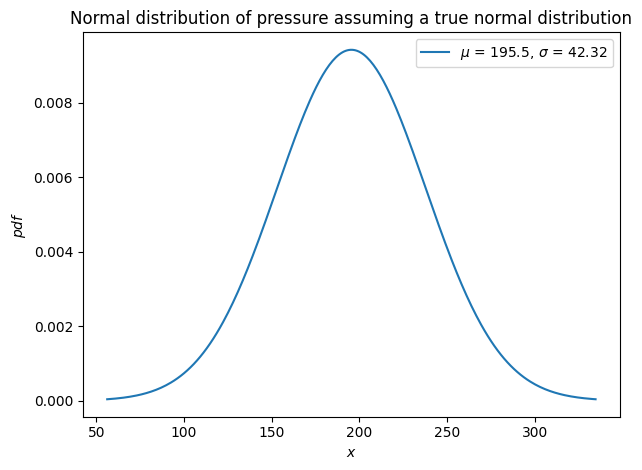

In [60]:
# plot using scipy.stats.Normal

X = Normal(mu=mu_prs1, sigma=std_prs1)
X.plot()
plt.title(r'Normal distribution of pressure assuming a true normal distribution')

plt.show()

## Exercise 3

#### Below is the code to calculate velocity and plot velocity map of one signature: Explain why do we check for the condition if time_diff != 0:?

the check is done to avoid dividing by zero since it would cause errors, if two rows (measurements) are taken close enough to each other, they would show up with the same value for time, which would make time_diff equal to zero

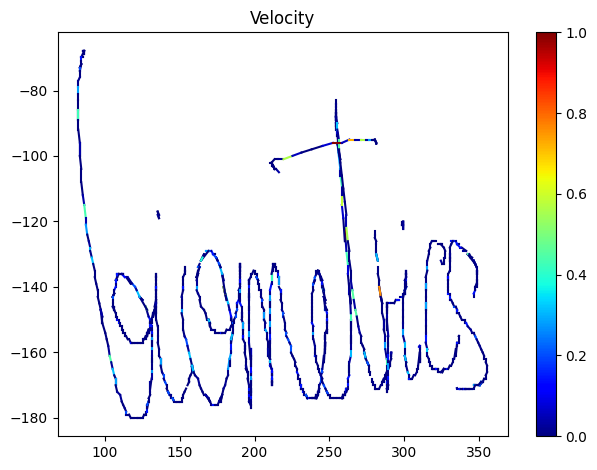

In [63]:
vel = np.zeros((len(time1)-1, 1))
fig, ax = plt.subplots()
for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i].item() * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = plt.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax = ax)
plt.show()

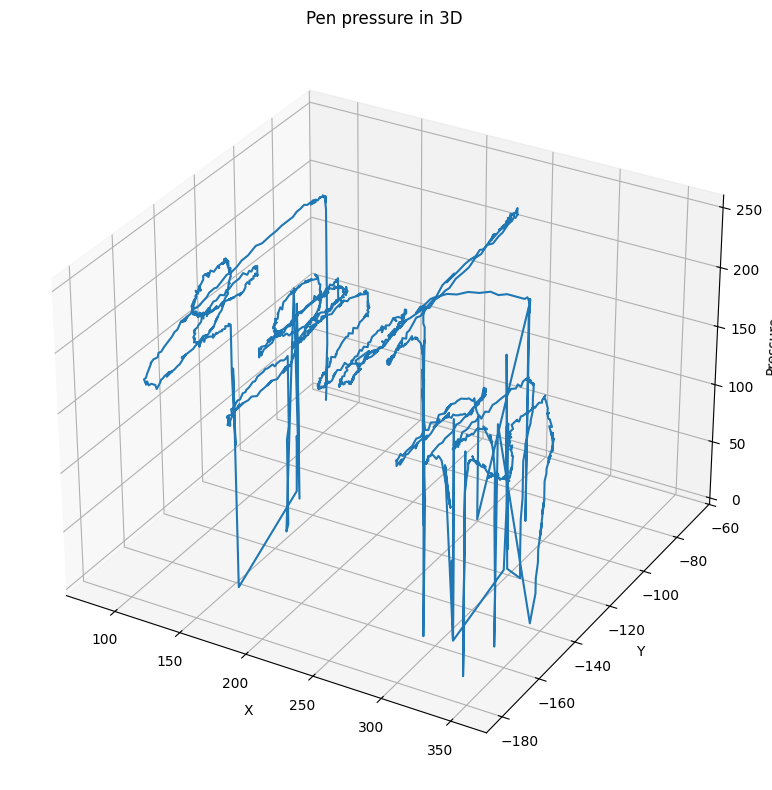

In [64]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D')
plt.show()

## Exercise 4

In [11]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i].item() * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [12]:
base_dataset = "encm509"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

pressures = []
velocity = []

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)
    # Should we not filter?
    prs = [ x for x in prs if 150 < x < 250 ]

    velocity = np.append(velocity, vel)
    pressures = np.append(pressures, prs)

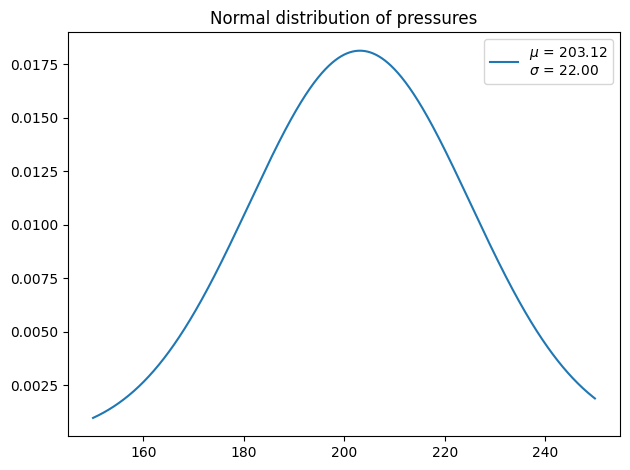

In [67]:
x = np.arange(150, 250, 0.1)

p_mu = np.mean(pressures)
p_std = np.std(pressures)

v_mu = np.mean(velocity)
v_std = np.std(velocity)

p_norm_dist = norm(p_mu, p_std)
v_norm_dist = norm(v_mu, v_std)

plt.plot(x, norm.pdf(x, p_mu, p_std))
plt.title("Normal distribution of pressures")
plt.legend([f"$\\mu$ = {p_mu:.2f}\n$\\sigma$ = {p_std:.2f}"])
plt.show()

In [14]:
x = np.arange(-70, 100, 0.1)

plt.plot(x, norm.pdf(x, v_mu, v_std))
plt.title("Normal distribution of velocity")
plt.legend([f"$\\mu$ = {v_mu:.2f}\n$\\sigma$ = {v_std:.2f}"])

## Exercise 4 (Alt. version)

In [77]:
base_dataset = "biometrics"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

genuine_pressures = np.zeros((30, 2))
genuine_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    genuine_velocity[i, 0] = np.mean(vel)
    genuine_velocity[i, 1] = np.std(vel)

    genuine_pressures[i, 0] = np.mean(prs)
    genuine_pressures[i, 1] = np.std(prs)


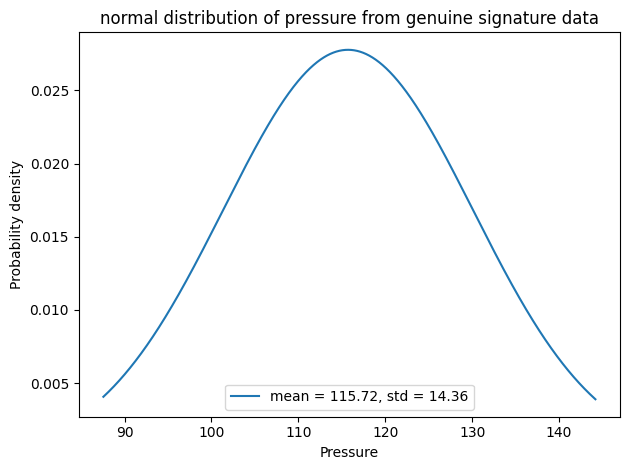

In [79]:
means_array = genuine_pressures[:,0]

arranged_genuine_pressures = np.arange(min(means_array), max(means_array), 0.01)
genuine_pressure_mean = np.mean(means_array)
genuine_pressure_std = np.std(means_array)

genuine_pressure_pdf = norm.pdf(arranged_genuine_pressures, genuine_pressure_mean, genuine_pressure_std)

plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("normal distribution of pressure from genuine signature data")
plt.legend([f"mean = {genuine_pressure_mean:.2f}, std = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

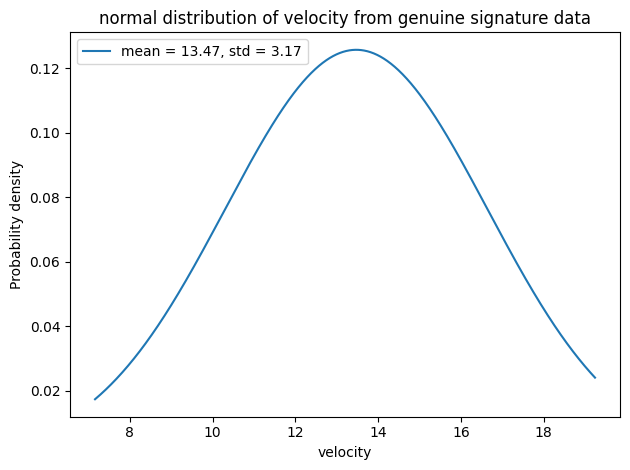

In [88]:
means_array = genuine_velocity[:,0]

arranged_genuine_velocity = np.arange(min(means_array), max(means_array), 0.01)
genuine_velocity_mean = np.mean(means_array)
genuine_velocity_std = np.std(means_array)

genuine_velocity_pdf = norm.pdf(arranged_genuine_velocity, genuine_velocity_mean, genuine_velocity_std)

plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("normal distribution of velocity from genuine signature data")
plt.legend([f"mean = {genuine_velocity_mean:.2f}, std = {genuine_velocity_std:.2f}"])
plt.xlabel('velocity')
plt.ylabel('Probability density')
plt.show()

## Exercise 5

In [87]:
base_dataset = "biometrics"
subdir = "impostor"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

impostor_pressures = np.zeros((30, 2))
impostor_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    impostor_velocity[i, 0] = np.mean(vel)
    impostor_velocity[i, 1] = np.std(vel)

    impostor_pressures[i, 0] = np.mean(prs)
    impostor_pressures[i, 1] = np.std(prs)

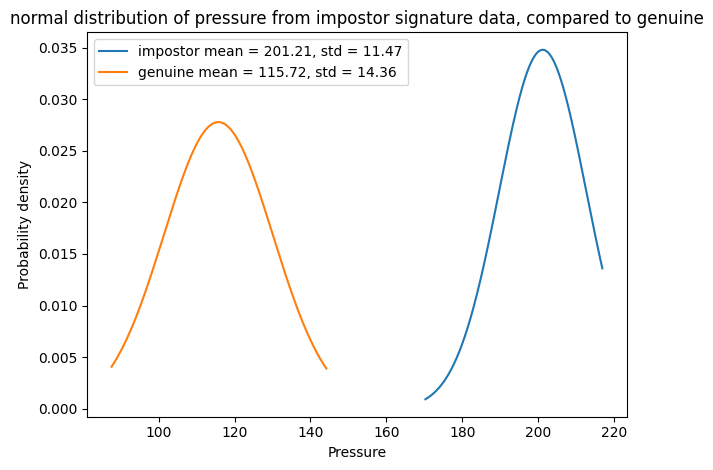

In [85]:
means_array = impostor_pressures[:,0]

arranged_impostor_pressures = np.arange(min(means_array), max(means_array), 0.01)
impostor_pressure_mean = np.mean(means_array)
impostor_pressure_std = np.std(means_array)

impostor_pressure_pdf = norm.pdf(arranged_impostor_pressures, impostor_pressure_mean, impostor_pressure_std)

plt.plot(arranged_impostor_pressures, impostor_pressure_pdf)
plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("normal distribution of pressure from impostor signature data, compared to genuine")
plt.legend([f"impostor mean = {impostor_pressure_mean:.2f}, std = {impostor_pressure_std:.2f}", f"genuine mean = {genuine_pressure_mean:.2f}, std = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

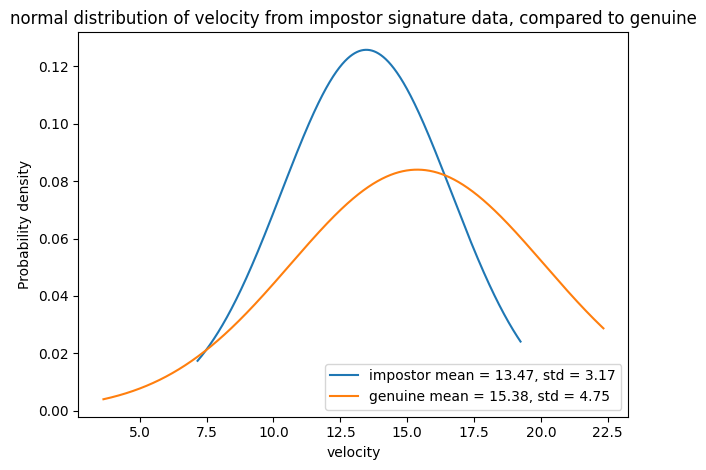

In [86]:
means_array = impostor_velocity[:,0]

arranged_impostor_velocity = np.arange(min(means_array), max(means_array), 0.01)
impostor_velocity_mean = np.mean(means_array)
impostor_velocity_std = np.std(means_array)

impostor_velocity_pdf = norm.pdf(arranged_impostor_velocity, impostor_velocity_mean, impostor_velocity_std)

plt.plot(arranged_impostor_velocity, impostor_velocity_pdf)
plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("normal distribution of velocity from impostor signature data, compared to genuine")
plt.legend([f"impostor mean = {impostor_velocity_mean:.2f}, std = {impostor_velocity_std:.2f}", f"genuine mean = {genuine_velocity_mean:.2f}, std = {genuine_velocity_std:.2f}"])
plt.xlabel('velocity')
plt.ylabel('Probability density')
plt.show()

## Need analysis here

## Loading data
The data folder should be in the same directory as this Notebook

In [15]:
base_dataset = "encm509"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}/'

csv_file = pd.read_csv(data_dir + '5.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,408.200140,41.566094,0.226374,0
1,407.496994,41.381518,0.279609,1
2,404.965667,41.117838,0.325763,16
3,406.559465,41.302414,0.303053,16
4,406.559465,41.302414,0.303053,16


## Plotting based on Pressure

In [16]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = plt.get_cmap('jet', np.max(prs1)+1)

In [17]:
fig, ax = plt.subplots()

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], linewidth=2, color=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax);

## Plotting presure over time

In [18]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [19]:
np.max(prs), np.min(prs), np.mean(prs)

(np.int64(248), np.int64(151), np.float64(197.41666666666666))

In [20]:
plt.plot(prs)
plt.ylim([150, 250]);

In [21]:
plt.hist(prs1, density=True);

In [22]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

183.59390862944161 48.5714980183646


## Plotting and calculating the Velocity

In [23]:
vel = np.zeros((len(time1)-1, 1))
fig, ax = plt.subplots()
for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i].item() * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = plt.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax = ax);

In [24]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

In [25]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

In [26]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [27]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.46; velocity: 16.00
#1 - pressure: 0.46; velocity: 12.33
#2 - pressure: 0.48; velocity: 18.40
#3 - pressure: 0.47; velocity: 14.45
#4 - pressure: 0.46; velocity: 22.63
#5 - pressure: 0.53; velocity: 22.09
#6 - pressure: 0.49; velocity: 12.82
#7 - pressure: 0.50; velocity: 19.85
#8 - pressure: 0.50; velocity: 8.11
#9 - pressure: 0.47; velocity: 11.41
#10 - pressure: 0.51; velocity: 8.21
#11 - pressure: 0.58; velocity: 8.65
#12 - pressure: 0.58; velocity: 7.23
#13 - pressure: 0.48; velocity: 17.67
#14 - pressure: 0.51; velocity: 16.50
#15 - pressure: 0.55; velocity: 8.25
#16 - pressure: 0.58; velocity: 23.29
#17 - pressure: 0.59; velocity: 7.66
#18 - pressure: 0.59; velocity: 7.48
#19 - pressure: 0.56; velocity: 7.59
#20 - pressure: 0.58; velocity: 18.07
#21 - pressure: 0.56; velocity: 16.21
#22 - pressure: 0.57; velocity: 9.57
#23 - pressure: 0.56; velocity: 7.77
#24 - pressure: 0.61; velocity: 15.40
#25 - pressure: 0.60; velocity: 17.60
#26 - pressure: 0.56; velocity: 

In [28]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

16.00494071146245 38.759405020790176


In [29]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
- Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
- Plot the histogram with 100 bins.
- Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided. Plot the signature in 2D with the color representing the pressure on each point. Similarly to calculation of the mean and std of the random data, calculate the mean and std of the pressure for one signature, and plot the Normal distribution.

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. 
    - Explain why it is necessary.
    - Plot in 3D, where the third coordinate represents pressure.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?